In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import pandas as pd
sns.set(style="whitegrid")


In [72]:
df = pd.read_csv('../data/winequality-red.csv', sep=';', encoding='utf-8')
wine_name='red'

In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [74]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [75]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


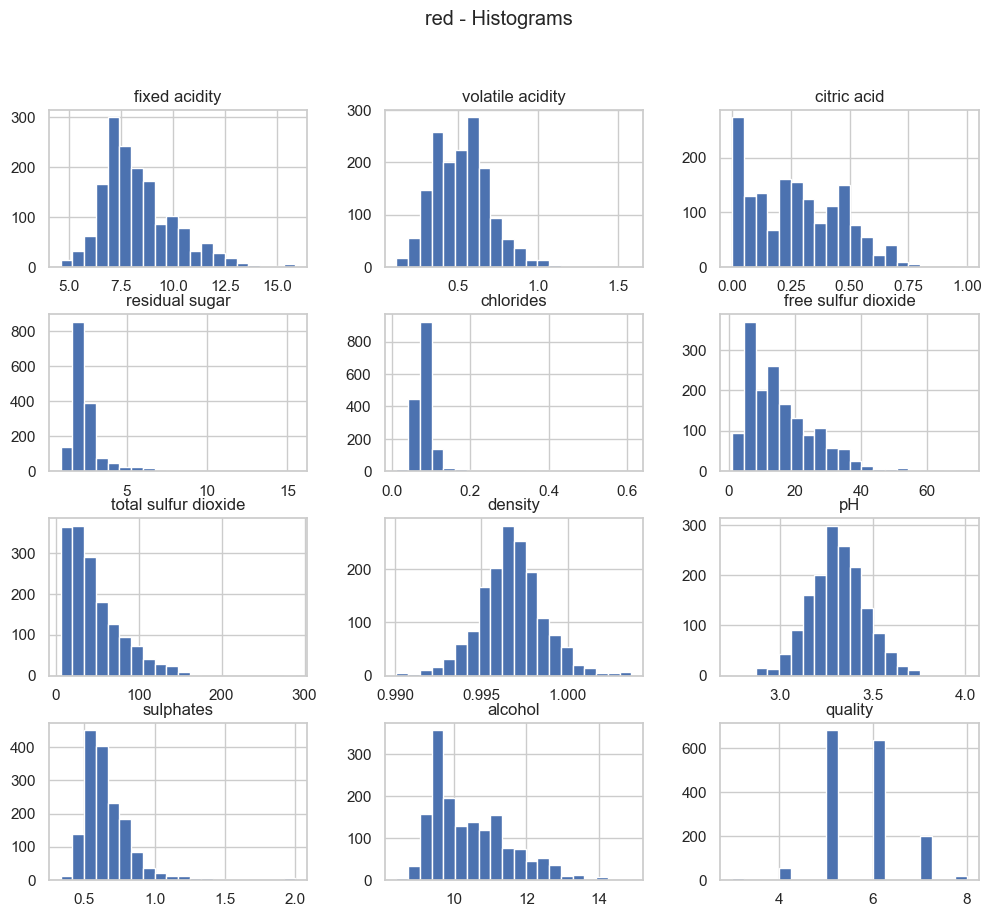

In [76]:
df.hist(bins=20, figsize=(12,10))
plt.suptitle(f"{wine_name} - Histograms")
plt.show()
    

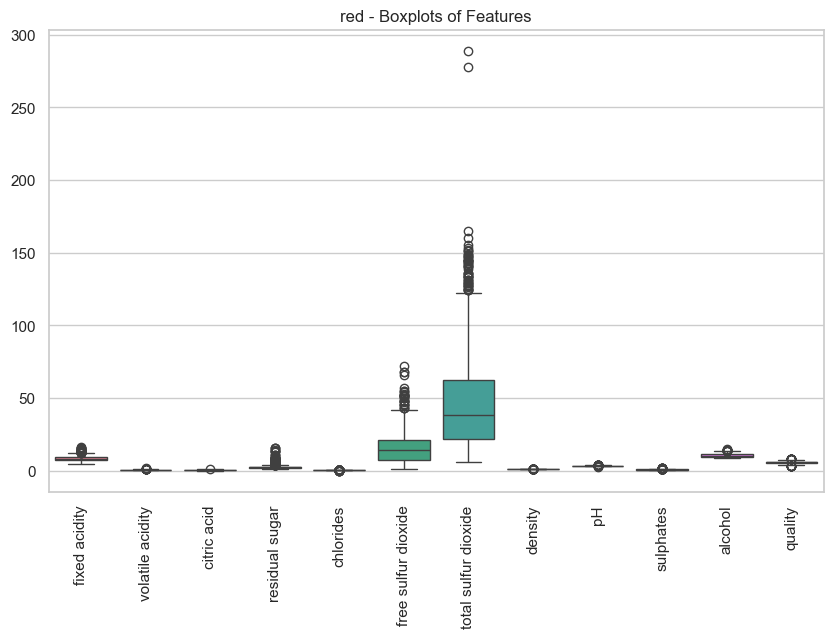

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title(f"{wine_name} - Boxplots of Features")
plt.show()

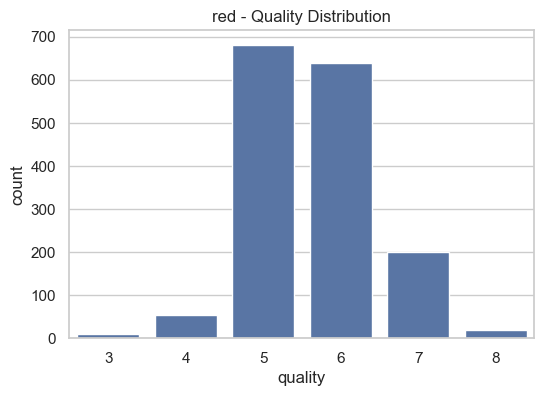

In [78]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title(f"{wine_name} - Quality Distribution")
plt.show()

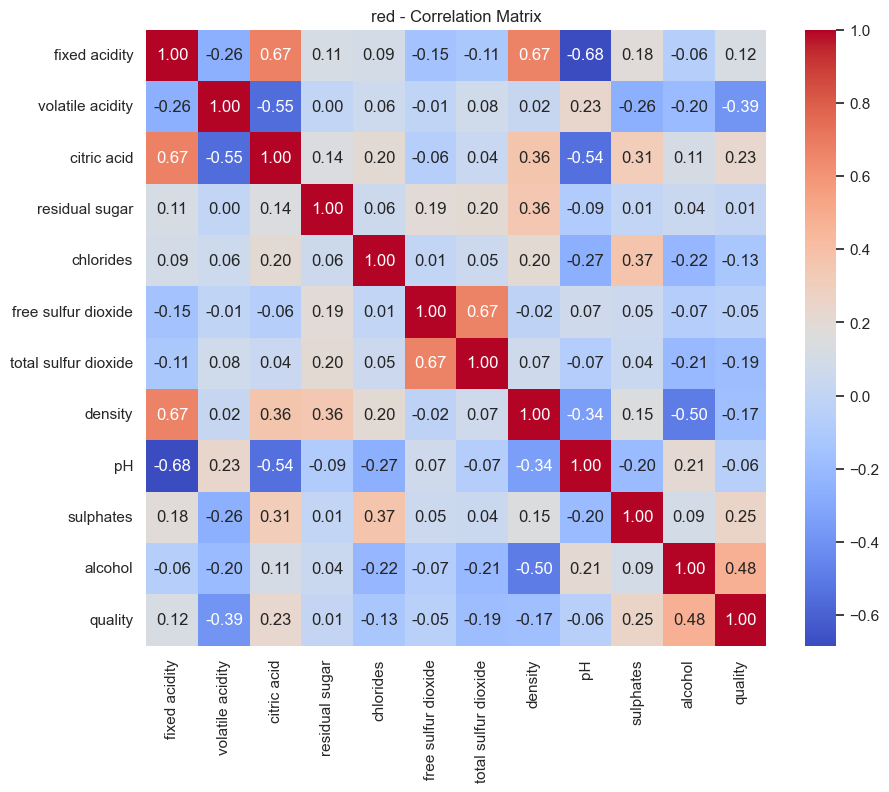

In [79]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"{wine_name} - Correlation Matrix")
plt.show()

In [80]:
from sklearn.linear_model import LassoCV

X = df.drop('quality', axis=1)
y = df['quality']
X_scaled = StandardScaler().fit_transform(X)

lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
coef = pd.Series(lasso.coef_, index=X.columns)
print(coef[coef!=0].sort_values(key=abs, ascending=False))


alcohol                 0.306744
volatile acidity       -0.187364
sulphates               0.144381
total sulfur dioxide   -0.098367
chlorides              -0.085443
pH                     -0.067950
free sulfur dioxide     0.035663
citric acid            -0.011458
residual sugar          0.006555
fixed acidity           0.002823
dtype: float64


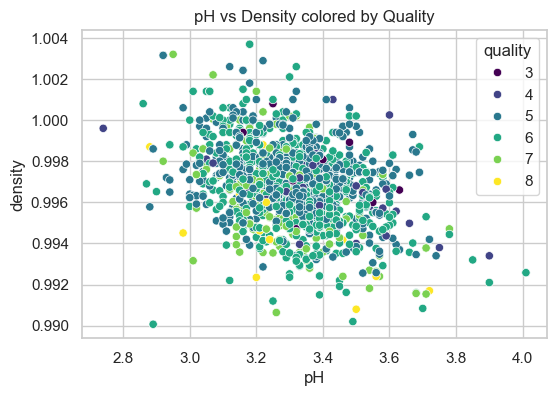

In [81]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='pH', y='density', hue='quality', data=df, palette='viridis')
plt.title('pH vs Density colored by Quality')
plt.show()

df['pH_density'] = df['pH'] * df['density']

In [92]:

columns= ['alcohol', 'sulphates', 'density', 'pH_density', 'fixed acidity']
X = df[columns] 
# X = df.drop('quality', axis=1)
y = df['quality']
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)      

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
    
    
def report_metrics(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    sse  = np.sum((y_true - y_pred) ** 2)
    return mae, rmse, r2, sse
    
mae, rmse, r2 , sse= report_metrics(y_test, y_pred)

print("Linear Regression Test metrics:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R2   = {r2:.4f}")
print(f"SSE   = {sse:.4f}")

residuals = y_test - y_pred



Linear Regression Test metrics:
MAE  = 0.5339
RMSE = 0.6665
R2   = 0.3202
SSE   = 142.1638


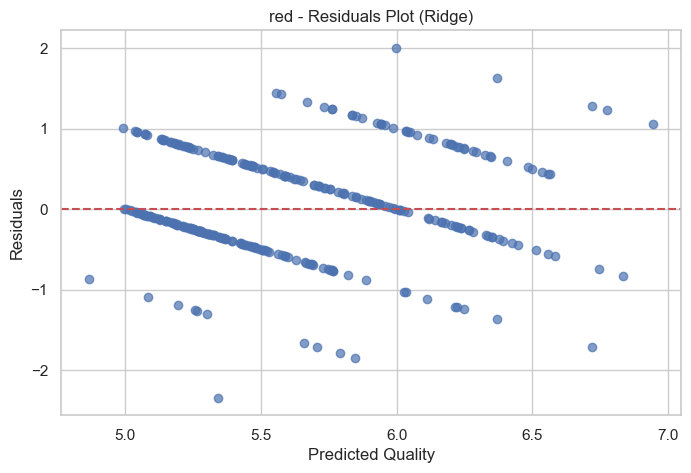

In [83]:
# رسم نمودار پسماندها
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title(f"{wine_name} - Residuals Plot (Ridge)")
plt.show()

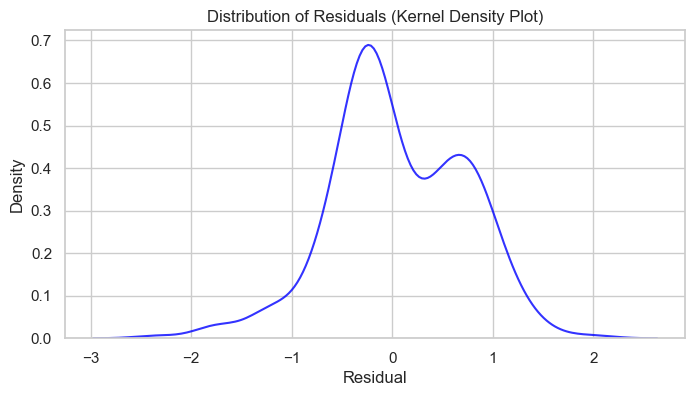

In [84]:
plt.figure(figsize=(8, 4))
sns.kdeplot(residuals,   color='blue', alpha=0.8)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals (Kernel Density Plot)')
plt.show()

In [ ]:

def analyze_combined_wine(df_red, df_white):
   
    df_red2   = df_red.copy()
    df_white2 = df_white.copy()
    df_red2['wine_type']   = 'red'
    df_white2['wine_type'] = 'white'
     
    df_combined = pd.concat([df_red2, df_white2], ignore_index=True)
    print("===== Combined EDA on 'wine_type' =====")
     
    plt.figure(figsize=(6,4))
    sns.countplot(x='wine_type', data=df_combined)
    plt.title("Distribution of Wine Types")
    plt.show()
     
    plt.figure(figsize=(8,5))
    sns.countplot(x='quality', hue='wine_type', data=df_combined)
    plt.title("Quality Distribution by Wine Type")
    plt.show()
     
    df_model = pd.get_dummies(df_combined, columns=['wine_type'], drop_first=True)
  
     
    # analyze_wine(df_model, "Combined (with wine_type dummy)")

NameError: name 'analyze_wine' is not defined